#### Capstone Project: 

Student name: Milena Afeworki   
Student pace: full time   
Scheduled project review date/time: 09/07/2021 @ 11:30 PT   
Instructor name: Abhineet Kulkarni   
Blog post URL:

# Bridges Condition Classificaiton Model



January 2019 marked the release of the Long-Term Bridge Performance (LTBP) Program’s InfoBridge™ web portal, a newly developed website for dissemination and visualization of bridge data, information, and products developed by the LTBP Program. The portal’s main purpose is to leverage the analytical capability of the highway bridge research community, and fulfill the Federal Highway Administration’s (FHWA’s) responsibility to provide transparency and ready access to data collected through Federal research programs.

## The Business Problem

Bridge management practices of departments of transportation is looking to assist bridge managers in making consistent and cost-effective decisions related to maintenance and rehabilitation of bridges. The decision making, either at the network level or at the project level, is based on current and future bridge conditions. Therefore, it is essential for a bridge management system to be capable of accurately predicting future bridge conditions to help make an informed decision on when and where to allocate maintenance budgets. 

## Data Understanding

The data pattern underlying the historical bridge inspection records contains useful information in
describing the deterioration trends of highway bridge decks, sub-structure and super-structure. Therefore, developing an appropriate
algorithm that can identify data patterns buried in history can solve the condition-forecast problem. The data-mining algorithm emphasizes the changing trends of bridge condition ratings along withother factors that may influence the structure-deterioration process.

The analysis uses NBI and climatic data from InfoBridge. The climatic data refer to the annual
numbers (unit in days) of freeze-thaw cycles and snowfalls. The National Aeronautics and Space
Administration (NASA) Modern-Era Retrospective Analysis for Research and Applications,
Version 2 (MERRA-2) program provides the original source of climate data  which is currently available from January 1, 1980 to December 31, 2020.


```
NBI scale	Condition	    Description

        9	Excellent	    New condition, no noteworthy deficiencies.
        8	Very good	    No repair needed.
        7	Good	         Some minor problems, minor maintenance needed.
        6	Satisfactory	 Some minor deterioration, major maintenance needed.
        5	Fair	         Minor section loss, cracking, spalling, or scouring.
        4	Poor	         Advanced section loss, deterioration, spalling or scouring; major rehabilitation needed. 
        3	Serious	      Section loss, deterioration, spalling or scouring seriously affected primary components.
        2	Critical	     Advanced deterioration of primary structural elements; bridge closed. 
        1	Imminent         Major deterioration or loss of section; bridge may be closed to traffic.
            failure
        0	Failed	       Out of service and beyond corrective action.

 ```


The government classifies a bridge as “structurally deficient” if any one of the following bridge components are rated less than or equal to 4 (in poor or worse condition):

- Deck condition
- Superstructure condition
- Substructure condition

## Obtain data

In [1]:
#Importing all the necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
sns.set_style()

In [2]:
# pd.options.display.max_columns = None

In [3]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)']

In [4]:
# load first dataset.
ddf = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/BridgesExport_August_25_2021_03_04_42.csv',
#                 names = columns, usecols=range(0,15),
                  error_bad_lines=False, sep = ',', header = 0)
ddf.head()

b'Skipping line 126: expected 15 fields, saw 17\nSkipping line 383: expected 15 fields, saw 17\nSkipping line 809: expected 15 fields, saw 17\nSkipping line 2082: expected 15 fields, saw 17\nSkipping line 2386: expected 15 fields, saw 17\nSkipping line 2393: expected 15 fields, saw 17\nSkipping line 2410: expected 15 fields, saw 17\nSkipping line 4092: expected 15 fields, saw 17\nSkipping line 4395: expected 15 fields, saw 17\nSkipping line 5794: expected 15 fields, saw 17\nSkipping line 6488: expected 15 fields, saw 17\nSkipping line 6785: expected 15 fields, saw 17\nSkipping line 7332: expected 15 fields, saw 17\nSkipping line 8118: expected 15 fields, saw 17\nSkipping line 8257: expected 15 fields, saw 17\nSkipping line 8265: expected 15 fields, saw 17\nSkipping line 8268: expected 15 fields, saw 17\nSkipping line 8505: expected 15 fields, saw 17\nSkipping line 9962: expected 15 fields, saw 17\nSkipping line 12500: expected 15 fields, saw 17\nSkipping line 12504: expected 15 fields,

b'Skipping line 131438: expected 15 fields, saw 17\nSkipping line 131796: expected 15 fields, saw 17\nSkipping line 134025: expected 15 fields, saw 17\nSkipping line 134265: expected 15 fields, saw 17\nSkipping line 135558: expected 15 fields, saw 17\nSkipping line 136073: expected 15 fields, saw 17\nSkipping line 137167: expected 15 fields, saw 17\nSkipping line 137295: expected 15 fields, saw 17\nSkipping line 139454: expected 15 fields, saw 17\nSkipping line 140879: expected 15 fields, saw 17\nSkipping line 142164: expected 15 fields, saw 17\nSkipping line 143902: expected 15 fields, saw 17\nSkipping line 144364: expected 15 fields, saw 17\nSkipping line 146438: expected 15 fields, saw 17\nSkipping line 147104: expected 15 fields, saw 17\nSkipping line 150482: expected 15 fields, saw 17\nSkipping line 153759: expected 15 fields, saw 17\nSkipping line 153761: expected 15 fields, saw 17\nSkipping line 153768: expected 15 fields, saw 17\nSkipping line 154491: expected 15 fields, saw 17

b'Skipping line 275204: expected 15 fields, saw 17\nSkipping line 276263: expected 15 fields, saw 17\nSkipping line 276518: expected 15 fields, saw 17\nSkipping line 276816: expected 15 fields, saw 17\nSkipping line 277840: expected 15 fields, saw 17\nSkipping line 278734: expected 15 fields, saw 17\nSkipping line 279546: expected 15 fields, saw 17\nSkipping line 283805: expected 15 fields, saw 17\nSkipping line 285381: expected 15 fields, saw 17\nSkipping line 290074: expected 15 fields, saw 17\nSkipping line 290106: expected 15 fields, saw 17\nSkipping line 290116: expected 15 fields, saw 17\nSkipping line 290169: expected 15 fields, saw 17\nSkipping line 290174: expected 15 fields, saw 17\nSkipping line 290195: expected 15 fields, saw 17\nSkipping line 290212: expected 15 fields, saw 17\nSkipping line 290213: expected 15 fields, saw 17\nSkipping line 290218: expected 15 fields, saw 17\nSkipping line 290231: expected 15 fields, saw 17\nSkipping line 290243: expected 15 fields, saw 17

b'Skipping line 466014: expected 15 fields, saw 17\nSkipping line 466375: expected 15 fields, saw 17\nSkipping line 469337: expected 15 fields, saw 17\nSkipping line 470597: expected 15 fields, saw 17\nSkipping line 470650: expected 15 fields, saw 17\nSkipping line 470658: expected 15 fields, saw 17\nSkipping line 471226: expected 15 fields, saw 17\nSkipping line 471528: expected 15 fields, saw 17\nSkipping line 473704: expected 15 fields, saw 17\nSkipping line 473877: expected 15 fields, saw 17\nSkipping line 474018: expected 15 fields, saw 17\nSkipping line 474197: expected 15 fields, saw 17\nSkipping line 477680: expected 15 fields, saw 17\nSkipping line 479053: expected 15 fields, saw 17\nSkipping line 480985: expected 15 fields, saw 17\nSkipping line 482970: expected 15 fields, saw 17\nSkipping line 483247: expected 15 fields, saw 17\nSkipping line 484162: expected 15 fields, saw 17\nSkipping line 487687: expected 15 fields, saw 17\nSkipping line 492133: expected 15 fields, saw 17

,1 - State Name,8 - Structure Number,22 - Owner Agency,CAT10 - Bridge Condition,Bridge Age (yr),26 - Functional Class Of Inventory Route,28A - Lanes On the Structure,28B - Lanes Under the Structure,5C - Designated Level of Service Code,30 - Year of Average Daily Traffic,104 - Inventory Route NHS Code,110 - Designated National Truck Network Code,54B - Minimum Vertical Underclearance (ft),55B - Minimum Lateral Underclearance on Right (ft),56 - Minimum Lateral Underclearance on Left (ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','Good',45,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
1,'1 - Alabama',080106000001009,'U.S. Forest Service','Fair',40,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
2,'1 - Alabama',020222,'State Highway Agency','Good',7,'7',2,0,'1',2013.0,'0','0',0.0,0.0,0.0
3,'1 - Alabama',021152,'State Highway Agency','Good',4,'11',1,2,'7',2017.0,'0','0',14.4,9.2,7.8
4,'1 - Alabama',021480,'State Highway Agency','Good',15,'2',2,0,'1',2012.0,'1','1',0.0,0.0,0.0


In [5]:
ddf.shape

(617127, 15)

In [6]:
ddf.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)'],
      dtype='object')

In [7]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days']

In [8]:
# Load second dataset.
new_df = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/BridgesExport_August_19_2021_07_08_24.csv',
#                      names = columns, usecols=range(0,11), 
                     error_bad_lines=False, sep = ',', header = 0)
new_df.head()

b'Skipping line 70: expected 11 fields, saw 13\nSkipping line 485: expected 11 fields, saw 13\nSkipping line 863: expected 11 fields, saw 13\nSkipping line 2009: expected 11 fields, saw 13\nSkipping line 2373: expected 11 fields, saw 13\nSkipping line 2380: expected 11 fields, saw 13\nSkipping line 2388: expected 11 fields, saw 13\nSkipping line 4141: expected 11 fields, saw 13\nSkipping line 4223: expected 11 fields, saw 13\nSkipping line 5789: expected 11 fields, saw 13\nSkipping line 6447: expected 11 fields, saw 13\nSkipping line 6772: expected 11 fields, saw 13\nSkipping line 7618: expected 11 fields, saw 13\nSkipping line 8167: expected 11 fields, saw 13\nSkipping line 8270: expected 11 fields, saw 13\nSkipping line 8286: expected 11 fields, saw 13\nSkipping line 8294: expected 11 fields, saw 13\nSkipping line 8297: expected 11 fields, saw 13\nSkipping line 9908: expected 11 fields, saw 13\nSkipping line 12415: expected 11 fields, saw 13\nSkipping line 12419: expected 11 fields, 

b'Skipping line 197944: expected 11 fields, saw 13\nSkipping line 198624: expected 11 fields, saw 13\nSkipping line 198996: expected 11 fields, saw 13\nSkipping line 199148: expected 11 fields, saw 13\nSkipping line 199206: expected 11 fields, saw 13\nSkipping line 199370: expected 11 fields, saw 13\nSkipping line 199545: expected 11 fields, saw 13\nSkipping line 199851: expected 11 fields, saw 13\nSkipping line 199875: expected 11 fields, saw 13\nSkipping line 199889: expected 11 fields, saw 13\nSkipping line 199892: expected 11 fields, saw 13\nSkipping line 199919: expected 11 fields, saw 13\nSkipping line 199985: expected 11 fields, saw 13\nSkipping line 199986: expected 11 fields, saw 13\nSkipping line 200093: expected 11 fields, saw 13\nSkipping line 200273: expected 11 fields, saw 13\nSkipping line 200385: expected 11 fields, saw 13\nSkipping line 200717: expected 11 fields, saw 13\nSkipping line 201100: expected 11 fields, saw 13\nSkipping line 201323: expected 11 fields, saw 13

b'Skipping line 394548: expected 11 fields, saw 13\nSkipping line 394835: expected 11 fields, saw 13\nSkipping line 394839: expected 11 fields, saw 13\nSkipping line 395021: expected 11 fields, saw 13\nSkipping line 395063: expected 11 fields, saw 13\nSkipping line 395065: expected 11 fields, saw 13\nSkipping line 395174: expected 11 fields, saw 13\nSkipping line 395178: expected 11 fields, saw 13\nSkipping line 396715: expected 11 fields, saw 13\nSkipping line 396995: expected 11 fields, saw 13\nSkipping line 397122: expected 11 fields, saw 13\nSkipping line 397153: expected 11 fields, saw 13\nSkipping line 397228: expected 11 fields, saw 13\nSkipping line 397262: expected 11 fields, saw 13\nSkipping line 397281: expected 11 fields, saw 13\nSkipping line 397359: expected 11 fields, saw 13\nSkipping line 397360: expected 11 fields, saw 13\nSkipping line 397364: expected 11 fields, saw 13\nSkipping line 397376: expected 11 fields, saw 13\nSkipping line 397395: expected 11 fields, saw 13

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,Number of Snowfall Days
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,NaN
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,NaN
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,8.0
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,NaN
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,0.0


In [9]:
new_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days'],
      dtype='object')

In [10]:
new_df.shape

(617127, 11)

In [11]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)']

In [12]:
# load third dataset
df = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/Bridge_data.txt',
#                  names = columns, usecols=range(0,15),
                 error_bad_lines=False, sep = ',', header = 0)
df.head()

b'Skipping line 145: expected 15 fields, saw 17\nSkipping line 216: expected 15 fields, saw 16\nSkipping line 271: expected 15 fields, saw 16\nSkipping line 438: expected 15 fields, saw 17\nSkipping line 795: expected 15 fields, saw 16\nSkipping line 921: expected 15 fields, saw 17\nSkipping line 1323: expected 15 fields, saw 16\nSkipping line 2064: expected 15 fields, saw 17\nSkipping line 2103: expected 15 fields, saw 16\nSkipping line 2183: expected 15 fields, saw 16\nSkipping line 2187: expected 15 fields, saw 16\nSkipping line 2356: expected 15 fields, saw 17\nSkipping line 2419: expected 15 fields, saw 17\nSkipping line 2426: expected 15 fields, saw 17\nSkipping line 2446: expected 15 fields, saw 16\nSkipping line 2534: expected 15 fields, saw 16\nSkipping line 2718: expected 15 fields, saw 17\nSkipping line 2972: expected 15 fields, saw 16\nSkipping line 3102: expected 15 fields, saw 16\nSkipping line 3208: expected 15 fields, saw 16\nSkipping line 3283: expected 15 fields, saw 

b'Skipping line 66676: expected 15 fields, saw 16\nSkipping line 66682: expected 15 fields, saw 16\nSkipping line 66774: expected 15 fields, saw 16\nSkipping line 66811: expected 15 fields, saw 16\nSkipping line 66884: expected 15 fields, saw 16\nSkipping line 66949: expected 15 fields, saw 16\nSkipping line 67038: expected 15 fields, saw 16\nSkipping line 67092: expected 15 fields, saw 16\nSkipping line 67357: expected 15 fields, saw 16\nSkipping line 67434: expected 15 fields, saw 16\nSkipping line 67435: expected 15 fields, saw 16\nSkipping line 67474: expected 15 fields, saw 16\nSkipping line 67694: expected 15 fields, saw 16\nSkipping line 67761: expected 15 fields, saw 16\nSkipping line 67804: expected 15 fields, saw 16\nSkipping line 67840: expected 15 fields, saw 16\nSkipping line 67876: expected 15 fields, saw 16\nSkipping line 67892: expected 15 fields, saw 16\nSkipping line 68169: expected 15 fields, saw 16\nSkipping line 68291: expected 15 fields, saw 17\nSkipping line 6832

b'Skipping line 201287: expected 15 fields, saw 17\nSkipping line 201394: expected 15 fields, saw 17\nSkipping line 201698: expected 15 fields, saw 17\nSkipping line 201827: expected 15 fields, saw 17\nSkipping line 201856: expected 15 fields, saw 17\nSkipping line 201952: expected 15 fields, saw 17\nSkipping line 201970: expected 15 fields, saw 17\nSkipping line 201980: expected 15 fields, saw 17\nSkipping line 202151: expected 15 fields, saw 16\nSkipping line 202167: expected 15 fields, saw 16\nSkipping line 202169: expected 15 fields, saw 16\nSkipping line 202223: expected 15 fields, saw 16\nSkipping line 202294: expected 15 fields, saw 16\nSkipping line 202493: expected 15 fields, saw 16\nSkipping line 202545: expected 15 fields, saw 16\nSkipping line 202838: expected 15 fields, saw 16\nSkipping line 202912: expected 15 fields, saw 17\nSkipping line 203072: expected 15 fields, saw 17\nSkipping line 203118: expected 15 fields, saw 16\nSkipping line 203119: expected 15 fields, saw 17

b'Skipping line 270320: expected 15 fields, saw 16\nSkipping line 270423: expected 15 fields, saw 16\nSkipping line 270451: expected 15 fields, saw 16\nSkipping line 270461: expected 15 fields, saw 16\nSkipping line 270497: expected 15 fields, saw 16\nSkipping line 270649: expected 15 fields, saw 16\nSkipping line 270672: expected 15 fields, saw 16\nSkipping line 270673: expected 15 fields, saw 16\nSkipping line 271388: expected 15 fields, saw 16\nSkipping line 274267: expected 15 fields, saw 16\nSkipping line 274290: expected 15 fields, saw 16\nSkipping line 274292: expected 15 fields, saw 16\nSkipping line 274429: expected 15 fields, saw 16\nSkipping line 274455: expected 15 fields, saw 17\nSkipping line 274486: expected 15 fields, saw 17\nSkipping line 274489: expected 15 fields, saw 17\nSkipping line 274507: expected 15 fields, saw 17\nSkipping line 274512: expected 15 fields, saw 17\nSkipping line 274513: expected 15 fields, saw 17\nSkipping line 274514: expected 15 fields, saw 17

b'Skipping line 404913: expected 15 fields, saw 16\nSkipping line 404914: expected 15 fields, saw 16\nSkipping line 404915: expected 15 fields, saw 16\nSkipping line 404942: expected 15 fields, saw 16\nSkipping line 404950: expected 15 fields, saw 16\nSkipping line 404959: expected 15 fields, saw 16\nSkipping line 404961: expected 15 fields, saw 16\nSkipping line 404970: expected 15 fields, saw 16\nSkipping line 405010: expected 15 fields, saw 16\nSkipping line 405033: expected 15 fields, saw 16\nSkipping line 405040: expected 15 fields, saw 16\nSkipping line 405047: expected 15 fields, saw 16\nSkipping line 405149: expected 15 fields, saw 16\nSkipping line 405236: expected 15 fields, saw 16\nSkipping line 405238: expected 15 fields, saw 16\nSkipping line 405240: expected 15 fields, saw 17\nSkipping line 405248: expected 15 fields, saw 16\nSkipping line 405265: expected 15 fields, saw 16\nSkipping line 405267: expected 15 fields, saw 17\nSkipping line 405269: expected 15 fields, saw 16

b'Skipping line 540437: expected 15 fields, saw 16\nSkipping line 540512: expected 15 fields, saw 16\nSkipping line 540625: expected 15 fields, saw 16\nSkipping line 540628: expected 15 fields, saw 16\nSkipping line 540629: expected 15 fields, saw 16\nSkipping line 540712: expected 15 fields, saw 16\nSkipping line 541429: expected 15 fields, saw 16\nSkipping line 541986: expected 15 fields, saw 16\nSkipping line 542156: expected 15 fields, saw 16\nSkipping line 542609: expected 15 fields, saw 16\nSkipping line 542611: expected 15 fields, saw 16\nSkipping line 542698: expected 15 fields, saw 16\nSkipping line 542712: expected 15 fields, saw 16\nSkipping line 544095: expected 15 fields, saw 16\nSkipping line 544097: expected 15 fields, saw 16\nSkipping line 544118: expected 15 fields, saw 16\nSkipping line 544168: expected 15 fields, saw 16\nSkipping line 544296: expected 15 fields, saw 17\nSkipping line 544310: expected 15 fields, saw 16\nSkipping line 544325: expected 15 fields, saw 17

,1 - State Name,8 - Structure Number,22 - Owner Agency,3 - County Name,27 - Year Built,29 - Average Daily Traffic,43A - Main Design Mat Type Value,43B - Main Construction Design Value,45 - Number of Spans in Main Unit,49 - Structure Length (ft),6A - Features Intersected,7 - Facility Carried By Structure,CAT10 - Bridge Condition,Bridge Age (yr),CAT29 - Deck Area (sq.ft)
0,'1 - Alabama',020260,'County Highway Agency','069 - Houston County',1960,1654.0,'Concrete','Culvert',2,24.6,'SAUNDERS BRANCH ','W. SAUNDERS RD. ','Good',61,540.9
1,'1 - Alabama',007641,'State Highway Agency','005 - Barbour County',1962,13980.0,'Steel Continuous','Stringer/Multi-beam or Girder',4,1131.9,'CHATTAHOOCHEE RIVER ','US 82 MP 239.816 ','Fair',59,74642.3
2,'1 - Alabama',009096,'County Highway Agency','005 - Barbour County',1967,260.0,'Concrete','Culvert',3,26.2,'BLACKS BRANCH ','LEROY RD ','Fair',54,731.9
3,'1 - Alabama',019608,'County Highway Agency','113 - Russell County',2005,50.0,'Wood or Timber','Stringer/Multi-beam or Girder',2,24.0,'SNAKE CREEK ','WILDMAN BOTTOM ','Fair',16,385.0
4,'1 - Alabama',002529,'State Highway Agency','005 - Barbour County',1941,4495.0,'Steel Continuous','Stringer/Multi-beam or Girder',12,266.1,'WHITE OAK CREEK ','US 431 MP 57.766 ','Fair',80,7769.3


In [13]:
df.shape

(601036, 15)

In [14]:
df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)'],
      dtype='object')

In [15]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '9 - Location', '16 - Latitude (decimal)',
       '17 - Longitude (decimal)', '21 - Maintenance Responsibility',
       '106 - Year Reconstructed', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft)',
       '51 - Bridge Roadway Width Curb to Curb (ft)',
       '52 - Deck Width - Out to Out (ft)', '59 - Superstructure Condition',
       '60 - Substructure Condition', '58 - Deck Condition']

In [16]:
# load fourth dataset
df1 = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/Bridges_location_data.txt',
#                   names = columns, usecols=range(0,16), 
                  error_bad_lines=False,
                 sep = ',', header = 0)
df1.head()

b'Skipping line 91: expected 16 fields, saw 18\nSkipping line 106: expected 16 fields, saw 18\nSkipping line 118: expected 16 fields, saw 18\nSkipping line 140: expected 16 fields, saw 18\nSkipping line 225: expected 16 fields, saw 18\nSkipping line 266: expected 16 fields, saw 18\nSkipping line 274: expected 16 fields, saw 18\nSkipping line 282: expected 16 fields, saw 18\nSkipping line 286: expected 16 fields, saw 18\nSkipping line 292: expected 16 fields, saw 18\nSkipping line 294: expected 16 fields, saw 18\nSkipping line 349: expected 16 fields, saw 18\nSkipping line 380: expected 16 fields, saw 18\nSkipping line 387: expected 16 fields, saw 18\nSkipping line 391: expected 16 fields, saw 18\nSkipping line 403: expected 16 fields, saw 18\nSkipping line 446: expected 16 fields, saw 18\nSkipping line 461: expected 16 fields, saw 18\nSkipping line 462: expected 16 fields, saw 18\nSkipping line 465: expected 16 fields, saw 18\nSkipping line 472: expected 16 fields, saw 18\nSkipping lin

b'Skipping line 100178: expected 16 fields, saw 18\nSkipping line 101252: expected 16 fields, saw 18\nSkipping line 102087: expected 16 fields, saw 17\nSkipping line 102258: expected 16 fields, saw 18\nSkipping line 102423: expected 16 fields, saw 17\nSkipping line 102628: expected 16 fields, saw 17\nSkipping line 102707: expected 16 fields, saw 17\nSkipping line 102708: expected 16 fields, saw 17\nSkipping line 102710: expected 16 fields, saw 17\nSkipping line 102711: expected 16 fields, saw 17\nSkipping line 102901: expected 16 fields, saw 17\nSkipping line 103016: expected 16 fields, saw 17\nSkipping line 103017: expected 16 fields, saw 17\nSkipping line 103022: expected 16 fields, saw 17\nSkipping line 103436: expected 16 fields, saw 18\nSkipping line 103571: expected 16 fields, saw 18\nSkipping line 103747: expected 16 fields, saw 19\nSkipping line 103759: expected 16 fields, saw 18\nSkipping line 104002: expected 16 fields, saw 18\nSkipping line 104189: expected 16 fields, saw 18

b'Skipping line 234351: expected 16 fields, saw 18\nSkipping line 235965: expected 16 fields, saw 18\nSkipping line 236609: expected 16 fields, saw 18\nSkipping line 236965: expected 16 fields, saw 18\nSkipping line 238869: expected 16 fields, saw 17\nSkipping line 238885: expected 16 fields, saw 17\nSkipping line 239327: expected 16 fields, saw 17\nSkipping line 242805: expected 16 fields, saw 18\nSkipping line 243012: expected 16 fields, saw 18\nSkipping line 243607: expected 16 fields, saw 17\nSkipping line 244369: expected 16 fields, saw 18\nSkipping line 251598: expected 16 fields, saw 17\nSkipping line 252953: expected 16 fields, saw 17\nSkipping line 254310: expected 16 fields, saw 17\nSkipping line 254645: expected 16 fields, saw 17\nSkipping line 255592: expected 16 fields, saw 17\nSkipping line 256040: expected 16 fields, saw 17\nSkipping line 256328: expected 16 fields, saw 18\nSkipping line 256415: expected 16 fields, saw 17\nSkipping line 256856: expected 16 fields, saw 17

b'Skipping line 364398: expected 16 fields, saw 18\nSkipping line 364622: expected 16 fields, saw 17\nSkipping line 364672: expected 16 fields, saw 18\nSkipping line 364674: expected 16 fields, saw 18\nSkipping line 364960: expected 16 fields, saw 18\nSkipping line 364981: expected 16 fields, saw 18\nSkipping line 365332: expected 16 fields, saw 18\nSkipping line 365733: expected 16 fields, saw 17\nSkipping line 365749: expected 16 fields, saw 17\nSkipping line 365779: expected 16 fields, saw 18\nSkipping line 365780: expected 16 fields, saw 18\nSkipping line 365782: expected 16 fields, saw 18\nSkipping line 365899: expected 16 fields, saw 17\nSkipping line 365978: expected 16 fields, saw 18\nSkipping line 366189: expected 16 fields, saw 18\nSkipping line 366491: expected 16 fields, saw 17\nSkipping line 366517: expected 16 fields, saw 18\nSkipping line 368095: expected 16 fields, saw 18\nSkipping line 370963: expected 16 fields, saw 17\nSkipping line 371852: expected 16 fields, saw 17

b'Skipping line 496748: expected 16 fields, saw 18\nSkipping line 501256: expected 16 fields, saw 18\nSkipping line 505066: expected 16 fields, saw 18\nSkipping line 505084: expected 16 fields, saw 18\nSkipping line 505983: expected 16 fields, saw 17\nSkipping line 505995: expected 16 fields, saw 17\nSkipping line 506373: expected 16 fields, saw 17\nSkipping line 506685: expected 16 fields, saw 17\nSkipping line 506883: expected 16 fields, saw 18\nSkipping line 510371: expected 16 fields, saw 18\nSkipping line 510474: expected 16 fields, saw 17\nSkipping line 511323: expected 16 fields, saw 17\nSkipping line 511337: expected 16 fields, saw 17\nSkipping line 511345: expected 16 fields, saw 17\nSkipping line 511400: expected 16 fields, saw 17\nSkipping line 511405: expected 16 fields, saw 17\nSkipping line 511431: expected 16 fields, saw 17\nSkipping line 511454: expected 16 fields, saw 17\nSkipping line 511498: expected 16 fields, saw 17\nSkipping line 511520: expected 16 fields, saw 17

,1 - State Name,8 - Structure Number,22 - Owner Agency,3 - County Name,9 - Location,16 - Latitude (decimal),17 - Longitude (decimal),21 - Maintenance Responsibility,106 - Year Reconstructed,34 - Skew Angle (degrees),48 - Length of Maximum Span (ft),51 - Bridge Roadway Width Curb to Curb (ft),52 - Deck Width - Out to Out (ft),59 - Superstructure Condition,60 - Substructure Condition,58 - Deck Condition
0,'1 - Alabama',080103000001007,'U.S. Forest Service','039 - Covington County','CONECUH NATIONAL FOREST ',0.00000,0.000000,'64',0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'U.S. Forest Service','027 - Clay County','NATIONAL FOREST ',0.00000,0.000000,'64',0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'State Highway Agency','061 - Geneva County','1 mi. west of al 52 ',31.10981,-9.024917,'1',0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'State Highway Agency','073 - Jefferson County','_11TH AVE ',33.52243,-33.522430,'1',0.0,0.0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'State Highway Agency','069 - Houston County','GA. /ALA . LINE ',31.12305,-85.055270,'1',0.0,23.0,274.9,38.1,41.0,'7','7','7'


In [17]:
df1.shape

(612266, 16)

In [18]:
df1.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '9 - Location', '16 - Latitude (decimal)',
       '17 - Longitude (decimal)', '21 - Maintenance Responsibility',
       '106 - Year Reconstructed', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft)',
       '51 - Bridge Roadway Width Curb to Curb (ft)',
       '52 - Deck Width - Out to Out (ft)', '59 - Superstructure Condition',
       '60 - Substructure Condition', '58 - Deck Condition'],
      dtype='object')

## Merging tables

In [19]:
#Merge the first two datasets together
new_df = new_df.merge(ddf, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], 
                  right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], how='left')
new_df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,26 - Functional Class Of Inventory Route,28A - Lanes On the Structure,28B - Lanes Under the Structure,5C - Designated Level of Service Code,30 - Year of Average Daily Traffic,104 - Inventory Route NHS Code,110 - Designated National Truck Network Code,54B - Minimum Vertical Underclearance (ft),55B - Minimum Lateral Underclearance on Right (ft),56 - Minimum Lateral Underclearance on Left (ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,...,'7',2,0,'1',2013.0,'0','0',0.0,0.0,0.0
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,...,'11',1,2,'7',2017.0,'0','0',14.4,9.2,7.8
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,...,'2',2,0,'1',2012.0,'1','1',0.0,0.0,0.0


In [20]:
#Merge the second two datasets together
df = new_df.merge(df, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], 
                  right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], how='left')
df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,29 - Average Daily Traffic,43A - Main Design Mat Type Value,43B - Main Construction Design Value,45 - Number of Spans in Main Unit,49 - Structure Length (ft),6A - Features Intersected,7 - Facility Carried By Structure,CAT10 - Bridge Condition_y,Bridge Age (yr)_y,CAT29 - Deck Area (sq.ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,50.0,'Concrete','Culvert',2.0,21.0,'PERSIMMON CREEK ','332 ','Good',45.0,316.9
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,50.0,'Steel','Culvert',2.0,24.9,'HORSE CREEK ','FDR 637 ','Fair',40.0,449.9
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,...,1120.0,'Concrete','Culvert',3.0,24.9,'STREAM ','SR-54 MP 14.942 ','Good',7.0,899.9
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,...,2017.0,'Prestressed Concrete','Stringer/Multi-beam or Girder',1.0,75.1,'_15TH STREET NORTH ','_11TH AVE. RAMP ','Good',4.0,2070.5
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,...,4940.0,'Steel Continuous','Stringer/Multi-beam or Girder',3.0,955.1,'CHATTAHOOCHEE RIVER ','US84/ SR 38 ','Good',15.0,39167.1


In [21]:
#Merge the two merged datasets together
merged_df = df.merge(df1, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency',], how='left')
merged_df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,17 - Longitude (decimal),21 - Maintenance Responsibility,106 - Year Reconstructed,34 - Skew Angle (degrees),48 - Length of Maximum Span (ft),51 - Bridge Roadway Width Curb to Curb (ft),52 - Deck Width - Out to Out (ft),59 - Superstructure Condition,60 - Substructure Condition,58 - Deck Condition
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,0.000000,'64',0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,0.000000,'64',0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,...,-9.024917,'1',0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,...,-33.522430,'1',0.0,0.0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,...,-85.055270,'1',0.0,23.0,274.9,38.1,41.0,'7','7','7'


In [22]:
merged_df.shape

(617127, 48)

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617127 entries, 0 to 617126
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   1 - State Name                                      617127 non-null  object 
 1   8 - Structure Number                                617127 non-null  object 
 2   22 - Owner Agency                                   617127 non-null  object 
 3   107 - Deck Structure Type Code                      617127 non-null  object 
 4   108A - Wearing Surface Type Code                    617127 non-null  object 
 5   108B - Membrane Type Code                           617127 non-null  object 
 6   108C - Deck Protection Code                         617127 non-null  object 
 7   20 - Toll Status                                    617127 non-null  object 
 8   109 - Average Daily Truck Traffic (Percent ADT)     584617 non-n

## Exploratory Data Analysis

### Dropping irrelevant feature/columns

In [24]:
merged_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days',
       'CAT10 - Bridge Condition_x', 'Bridge Age (yr)_x',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)', '3 - County Name_x',
       '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design M

And the rest of the other features have been found to be of no relevance to our analysis since they are represented by some of the remaining columns in the one form or another.

Ex.
```
Deck Area -> Deck width, Bridge length
Year Built -> Bridge Age
```
    
 

In [25]:
#drop columns irrelevant for analysis
merged_df.drop(columns=['22 - Owner Agency',
                       'CAT10 - Bridge Condition_x', 'Bridge Age (yr)_x',
                        '27 - Year Built','3 - County Name_y', '9 - Location',
                        'CAT29 - Deck Area (sq.ft)', 
                        '7 - Facility Carried By Structure',
                        '21 - Maintenance Responsibility',
#                         '43B - Main Construction Design Value',
                        '6A - Features Intersected'
                       ], axis=1, inplace=True)

In [26]:
merged_df.shape

(617127, 38)

In [27]:
merged_df.columns

Index(['1 - State Name', '8 - Structure Number',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)', '3 - County Name_x',
       '29 - Average Daily Traffic', '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit'

In [28]:
# Rename the columns
merged_df.rename(columns={'1 - State Name':'state','8 - Structure Number':'str_id',
                          '26 - Functional Class Of Inventory Route':'inventory_class_route',
                          '28A - Lanes On the Structure':'lanes_on_str', 
                          '28B - Lanes Under the Structure':'lanes_under_str',
                          '5C - Designated Level of Service Code': 'level_service_code',
                          '30 - Year of Average Daily Traffic':'yr_avg_traffic',
                          '104 - Inventory Route NHS Code':'inventory_route_code',
                          '110 - Designated National Truck Network Code':'truck_network_code',
                          '54B - Minimum Vertical Underclearance (ft)':'min_vertical_underclearance',
                          '55B - Minimum Lateral Underclearance on Right (ft)':'min_lateral_underclearanceR',
                          '56 - Minimum Lateral Underclearance on Left (ft)':'min_lateral_underclearanceL',
                          '43B - Main Construction Design Value':'construction_design_value',
                          '16 - Latitude (decimal)':'latitude',
                          '17 - Longitude (decimal)':'longitude', 
                          '21 - Maintenance Responsibility': 'mnt_respons',
                          '106 - Year Reconstructed':'yr_reconst', 
                          '34 - Skew Angle (degrees)':'skew',
                          '48 - Length of Maximum Span (ft)':'max_span',
                          '51 - Bridge Roadway Width Curb to Curb (ft)':'bridge_width', 
                          '45 - Number of Spans in Main Unit':'num_spans',
                          '49 - Structure Length (ft)':'structure_length',
                          '107 - Deck Structure Type Code':'deck_type', 
                          '108A - Wearing Surface Type Code':'wearing_type',
                          '108B - Membrane Type Code':'membrane_type',
                          '108C - Deck Protection Code': 'deck_protection',
                          '20 - Toll Status':'toll',
                          'CAT10 - Bridge Condition_y': 'bridge_condition',
                          '109 - Average Daily Truck Traffic (Percent ADT)':'avg_truck_traffic',
                          '29 - Average Daily Traffic':'avg_daily_trfc',
                          'Bridge Age (yr)_y':'bridge_age',
                          '3 - County Name_x':'county',
                          '43A - Main Design Mat Type Value':'design_material',  
                          'Number of Freeze-Thaw Cycles':'freeze_thaw_cycle',
                          'Number of Snowfall Days':'snowfall_days',
                          '52 - Deck Width - Out to Out (ft)':'deck_width',
                          '59 - Superstructure Condition':'super_st_condition',
                          '60 - Substructure Condition':'sub_st_condition',
                          '58 - Deck Condition':'deck_condition'}, inplace=True)


In [29]:
merged_df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
0,'1 - Alabama',080103000001007,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'N','N','N','N','3',14.0,6.0,8.0,...,31.10981,-9.024917,0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'1','0','0','0','3',20.0,NaN,NaN,...,33.52243,-33.522430,0.0,0.0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'1','0','0','0','3',35.0,14.0,0.0,...,31.12305,-85.055270,0.0,23.0,274.9,38.1,41.0,'7','7','7'


**Latitude and longitude**

In [30]:
merged_df.latitude.isna().sum()

4861

In [31]:
# Convert 'str' values to numeric and errors to NaN
merged_df[['latitude']] = merged_df[['latitude']].apply(pd.to_numeric, errors='coerce')
merged_df[['longitude']] = merged_df[['longitude']].apply(pd.to_numeric, errors='coerce')

Text(0, 0.5, 'Latitude')

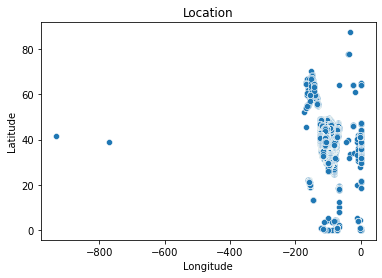

In [32]:
# plot coordinate values to visualize map
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [33]:
#Select Latitude and longitude values to drop outside the US vicinity 
to_drop = merged_df.loc[(merged_df['longitude'] < -167) | (merged_df['longitude'] > -50) | (merged_df['latitude'] < 20)]
to_drop.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
0,'1 - Alabama',080103000001007,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'N','N','N','N','3',14.0,6.0,8.0,...,31.10981,-9.024917,0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'1','0','0','0','3',20.0,NaN,NaN,...,33.52243,-33.522430,0.0,0.0,75.1,24.9,27.6,'9','9','9'
187,'1 - Alabama',DAPTRARUC025465,'2','0','0','0','3',1.0,16.0,1.0,...,31.37200,0.000000,0.0,0.0,34.1,14.4,16.4,'7','7','7'


In [34]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

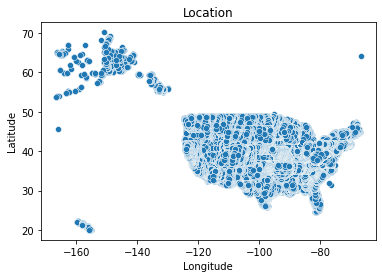

In [35]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [36]:
to_drop = merged_df.loc[(merged_df['latitude'] < 55) & (merged_df['longitude'] < -163) |
                        (merged_df['latitude'] > 50) & (merged_df['longitude'] > -80) ]

In [37]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

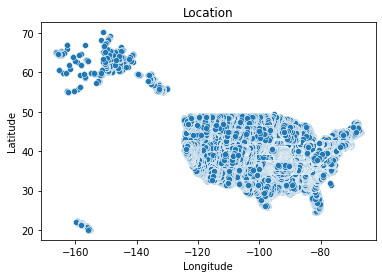

In [38]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Removing unwanted characters from State

In [39]:
# iterate over columns to remove qoutes
merged_df = merged_df.applymap(lambda x: x.replace("'", '') if (isinstance(x, str)) else x)

In [40]:
#remove quotes from state
merged_df['state'] = merged_df['state'].map(lambda x: x.lstrip(''))

#remove numbers and characters from 'state'
merged_df['state'] = merged_df['state'].replace('[0123456789-]', '', regex=True)
merged_df['county'] = merged_df['county'].replace('[0123456789-]', '', regex=True)

In [41]:
# iterate over columns to remove whitespace
merged_df = merged_df.applymap(lambda x: x.strip() if (isinstance(x, str)) else x)

In [42]:
merged_df.state

4             Alabama
5             Alabama
6             Alabama
7             Alabama
8             Alabama
             ...     
617122    Connecticut
617123    Connecticut
617124    Connecticut
617125    Connecticut
617126    Connecticut
Name: state, Length: 612944, dtype: object

In [43]:
merged_df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
4,Alabama,021480,1,0,0,0,3,35.0,14.0,0.0,...,31.12305,-85.05527,0.0,23.0,274.9,38.1,41.0,7,7,7
5,Alabama,009763,N,6,0,0,3,7.0,14.0,0.0,...,31.05112,-85.09267,0.0,45.0,12.1,0.0,0.0,N,N,N
6,Alabama,003324,N,N,N,N,3,7.0,14.0,0.0,...,31.17840,-85.11512,2009.0,0.0,7.9,0.0,0.0,N,N,N
7,Alabama,006369,1,0,0,0,3,7.0,14.0,0.0,...,31.18900,-85.11860,0.0,0.0,60.0,23.6,27.6,7,7,6
8,Alabama,015078,2,0,0,0,3,0.0,14.0,0.0,...,31.10713,-85.17017,0.0,0.0,15.1,23.6,24.9,5,6,5


### Removing irrelevant characters in Bridge condition

In [44]:
merged_df.bridge_condition.value_counts(normalize=True)

Fair    0.475733
Good    0.451783
Poor    0.072484
Name: bridge_condition, dtype: float64

In [45]:
# Get a list of the top 3 bridge_conditions
top3 = merged_df['bridge_condition'].value_counts()[:3].index

# At locations where the neighborhood is NOT in the top 3, 
# replace the brdige_condition with 'NA'
merged_df.loc[np.logical_not(merged_df['bridge_condition'].isin(top3)), 'bridge_condition'] = np.nan

In [46]:
merged_df.bridge_condition.value_counts()

Fair    283972
Good    269676
Poor     43267
Name: bridge_condition, dtype: int64

In [47]:
merged_df.bridge_condition.value_counts(normalize=True)

Fair    0.475733
Good    0.451783
Poor    0.072484
Name: bridge_condition, dtype: float64

### Dealing with missing values

We will be dropping the rows with missing locational data since they would be irrelevant if we can't locate them on the map.

In [48]:
merged_df.isna().sum()

state                              0
str_id                             0
deck_type                          0
wearing_type                       0
membrane_type                      0
deck_protection                    0
toll                               0
avg_truck_traffic              32238
freeze_thaw_cycle                 46
snowfall_days                     46
inventory_class_route              0
lanes_on_str                       0
lanes_under_str                    0
level_service_code                 0
yr_avg_traffic                    18
inventory_route_code               0
truck_network_code                 0
min_vertical_underclearance        0
min_lateral_underclearanceR        0
min_lateral_underclearanceL        0
county                         16029
avg_daily_trfc                 16045
design_material                16029
construction_design_value      16029
num_spans                      16029
structure_length               16029
bridge_condition               16029
b

In [49]:
# Drop rows which contain any NaN value in the selected columns
mod_df = merged_df.dropna( how='any',
                    subset=['latitude', 'longitude', 'bridge_condition'])

In [50]:
# fill 'avg_daily_trfc' missing values using random choice

s = mod_df.avg_daily_trfc.value_counts(normalize=True)
mod_df['avg_daily_trfic'] =mod_df['avg_daily_trfc']
mod_df.loc[mod_df.avg_daily_trfc.isna(),
           'avg_daily_trfic'] = np.random.choice(s.index, p=s.values, 
                                                 size=mod_df.avg_daily_trfc.isna().sum())

In [51]:
#drop the original 'avg_daily_trfc' column
mod_df.drop('avg_daily_trfc', axis=1, inplace=True)

In [52]:
# Replace missing values in yr_reconst by 0 assuming they have never been reconstructed
# Replace 'freeze_thaw_cycle', 'snowfall_days' missing values by 0 assuming they have no snowfall
cols = ['yr_reconst', 'freeze_thaw_cycle', 'snowfall_days']
for col in cols:
    mod_df[col].fillna(value=0, inplace=True)


In [53]:
mod_df.isna().sum()

state                              0
str_id                             0
deck_type                          0
wearing_type                       0
membrane_type                      0
deck_protection                    0
toll                               0
avg_truck_traffic              31144
freeze_thaw_cycle                  0
snowfall_days                      0
inventory_class_route              0
lanes_on_str                       0
lanes_under_str                    0
level_service_code                 0
yr_avg_traffic                    18
inventory_route_code               0
truck_network_code                 0
min_vertical_underclearance        0
min_lateral_underclearanceR        0
min_lateral_underclearanceL        0
county                             0
design_material                    0
construction_design_value          0
num_spans                          0
structure_length                   0
bridge_condition                   0
bridge_age                         0
l

Average truck traffic values missing acount for less than 6% of the data, but instead of lossing this data we will replace it by random choice.

In [54]:
# fill 'avg_truck_traffic' missing values using random choice
s = mod_df.avg_truck_traffic.value_counts(normalize=True)
mod_df['avg_truck_trfc'] =mod_df['avg_truck_traffic']
mod_df.loc[mod_df.avg_truck_trfc.isna(),
           'avg_truck_trfc'] = np.random.choice(s.index, p=s.values, size=mod_df.avg_truck_traffic.isna().sum())

In [55]:
#drop the original 'avg_truck_trfc' column
mod_df.drop('avg_truck_traffic', axis=1, inplace=True)

Referring to the National Bridge Inventory the Deck condition ranges from 0 to 9, with 0 signifying a failed structure and 9 being excellent condition of the structure, let's replace the character "N" with NAN and treat it as a missing value. 

In [56]:
cond_cols = ['deck_condition', 'sub_st_condition', 'super_st_condition']

for col in cond_cols:
    print(mod_df[col].value_counts())
    print('=======================')
    mod_df[col] = mod_df[col].replace({'N': np.nan}, regex=True)
    print(mod_df[col].value_counts())

7    191554
N    143438
6    113856
8     61947
5     55468
4     12190
9     10897
3      2150
0       785
2       399
1        72
Name: deck_condition, dtype: int64
7    191554
6    113856
8     61947
5     55468
4     12190
9     10897
3      2150
0       785
2       399
1        72
Name: deck_condition, dtype: int64
7    177119
N    138246
6    110455
8     71885
5     60488
4     16904
9     11362
3      4118
2      1150
0       778
1       251
Name: sub_st_condition, dtype: int64
7    177119
6    110455
8     71885
5     60488
4     16904
9     11362
3      4118
2      1150
0       778
1       251
Name: sub_st_condition, dtype: int64
7    171640
N    138080
6    108215
8     86399
5     56477
4     14119
9     13530
3      2740
0       779
2       591
1       186
Name: super_st_condition, dtype: int64
7    171640
6    108215
8     86399
5     56477
4     14119
9     13530
3      2740
0       779
2       591
1       186
Name: super_st_condition, dtype: int64


In [57]:
mod_df.isna().sum()

state                               0
str_id                              0
deck_type                           0
wearing_type                        0
membrane_type                       0
deck_protection                     0
toll                                0
freeze_thaw_cycle                   0
snowfall_days                       0
inventory_class_route               0
lanes_on_str                        0
lanes_under_str                     0
level_service_code                  0
yr_avg_traffic                     18
inventory_route_code                0
truck_network_code                  0
min_vertical_underclearance         0
min_lateral_underclearanceR         0
min_lateral_underclearanceL         0
county                              0
design_material                     0
construction_design_value           0
num_spans                           0
structure_length                    0
bridge_condition                    0
bridge_age                          0
latitude    

In [58]:
#change 'str' datatype of continuous variables to numeric values
to_numeric = ['avg_daily_trfic','yr_reconst','skew', 'max_span','num_spans',
              'structure_length','avg_truck_trfc', 'bridge_age','min_vertical_underclearance',
              'lanes_under_str','freeze_thaw_cycle','min_lateral_underclearanceR']

for col in to_numeric:
      mod_df[col] = pd.to_numeric(mod_df[col], errors='coerce') 

## Visualization

Text(0, 0.5, 'Number of Bridges')

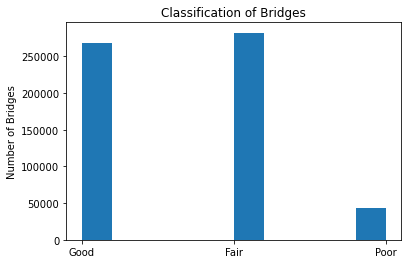

In [59]:
#plot number of wells according to functionality
plt.hist('bridge_condition', data=mod_df);
plt.title('Classification of Bridges')
plt.ylabel('Number of Bridges')

### Super structure condition

In [60]:
quantity_df = mod_df.groupby('super_st_condition')['bridge_condition'].value_counts().unstack()

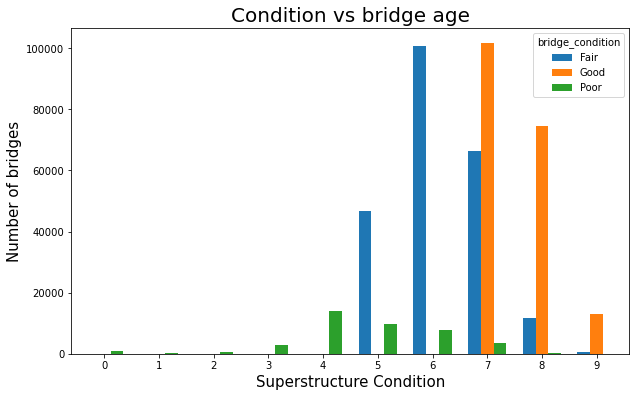

In [61]:
quantity_df.plot.bar(figsize = (10, 6), width=0.7)
plt.title('Condition vs bridge age', fontsize=20)
plt.xlabel('Superstructure Condition', fontsize=15)
plt.ylabel('Number of bridges', fontsize=15)
plt.xticks(rotation = 0);

In [62]:
# sns.pairplot(mod_df, hue='bridge_condition')

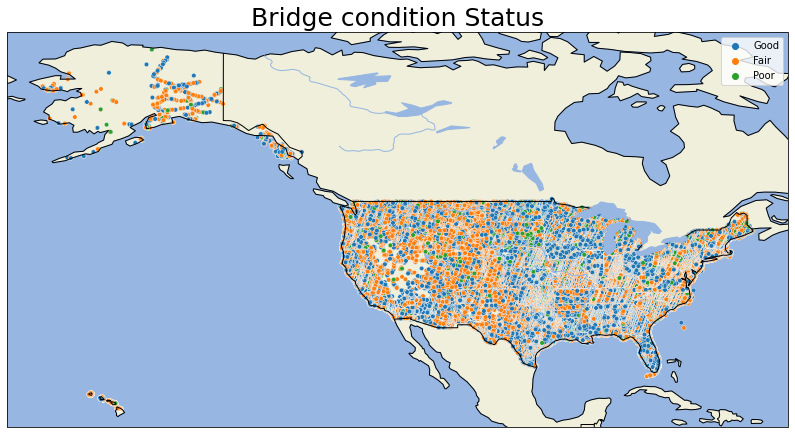

In [63]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS)
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(mod_df['longitude'], mod_df['latitude'], 
            s=20,
            hue=mod_df['bridge_condition'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Bridge condition Status', fontsize=25)
plt.legend()
plt.show()

In [64]:
mod_df.shape

(592756, 38)

In [65]:
mod_df1 = mod_df[:200000]
mod_df2 = mod_df[200000:400000]
mod_df3 = mod_df[400000:]

In [66]:
mod_df1.to_csv('bridge_data_cleaned1', index=False)
mod_df2.to_csv('bridge_data_cleaned2', index=False)
mod_df3.to_csv('bridge_data_cleaned3', index=False)

In the next step we will be taking a look at the modeling procedure for bridge condition classification. According to the NBI reports the three features (Super-structure, Sub-structure and Deck Condition) are dependent variables. Therefore, we will be dropping them since our target variable is 'bridge_condition.

In [67]:
mod_df.drop(columns=['super_st_condition', 'sub_st_condition', 'deck_condition'], axis=1, inplace=True)

In [68]:
#drop the nan values in 'bridge_condition'
mod_df.dropna(inplace=True)

In [ ]:
mod_df.to_csv('C:/Users/milen/MyStreamlit/Data/bridge_data.csv', index=False)

# Creating Dummies

In [69]:
mod_df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'inventory_class_route', 'lanes_on_str', 'lanes_under_str',
       'level_service_code', 'yr_avg_traffic', 'inventory_route_code',
       'truck_network_code', 'min_vertical_underclearance',
       'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'county',
       'design_material', 'construction_design_value', 'num_spans',
       'structure_length', 'bridge_condition', 'bridge_age', 'latitude',
       'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'avg_daily_trfic', 'avg_truck_trfc'],
      dtype='object')

In [70]:
#separate the features into target, categorical and continuous variables
target = ['bridge_condition']

categorical = ['deck_type', 'wearing_type', 'membrane_type', 'deck_protection',
               'toll', 'design_material',  'inventory_class_route', 'level_service_code', 'inventory_route_code',
               'truck_network_code',
               'construction_design_value']

continuous = ['freeze_thaw_cycle', 'snowfall_days', 'structure_length', 'bridge_age',
              'latitude', 'longitude', 'yr_reconst', 'skew', 'yr_avg_traffic',
              'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'num_spans',
              'avg_truck_trfc', 'min_vertical_underclearance','lanes_on_str', 
               'lanes_under_str',
               'min_lateral_underclearanceR', 'min_lateral_underclearanceL']

to_drop = ['state', 'str_id', 'county']

In [71]:
# print number of classes in each category
for col in categorical:
    print(col, mod_df[col].value_counts().count())

deck_type 10
wearing_type 11
membrane_type 7
deck_protection 10
toll 5
design_material 9
inventory_class_route 12
level_service_code 8
inventory_route_code 2
truck_network_code 2
construction_design_value 22


In [72]:
# select only the categorical variables
mod_df.drop(to_drop+target+continuous, axis=1).columns

Index(['deck_type', 'wearing_type', 'membrane_type', 'deck_protection', 'toll',
       'inventory_class_route', 'level_service_code', 'inventory_route_code',
       'truck_network_code', 'design_material', 'construction_design_value'],
      dtype='object')

In [73]:
# Use one-hot-encoding on categorical variables
df_dummies = pd.get_dummies(mod_df.drop(to_drop+target, axis=1))
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Orthotropic,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru
4,14.0,0.0,2,0,2012.0,0.0,0.0,0.0,3.0,955.1,...,0,0,0,0,0,1,0,0,0,0
5,14.0,0.0,2,0,1990.0,0.0,0.0,0.0,3.0,52.5,...,0,0,0,0,0,0,0,0,0,0
6,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,25.3,...,0,0,0,0,0,0,0,0,0,0
7,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,399.0,...,0,0,0,0,0,0,0,1,0,0
8,14.0,0.0,2,0,1992.0,0.0,0.0,0.0,3.0,44.9,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df_dummies.shape

(592738, 118)

In [75]:
df_dummies['bridge_condition'] = mod_df['bridge_condition']

In [76]:
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru,bridge_condition
4,14.0,0.0,2,0,2012.0,0.0,0.0,0.0,3.0,955.1,...,0,0,0,0,1,0,0,0,0,Good
5,14.0,0.0,2,0,1990.0,0.0,0.0,0.0,3.0,52.5,...,0,0,0,0,0,0,0,0,0,Fair
6,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,25.3,...,0,0,0,0,0,0,0,0,0,Good
7,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,399.0,...,0,0,0,0,0,0,1,0,0,Fair
8,14.0,0.0,2,0,1992.0,0.0,0.0,0.0,3.0,44.9,...,0,0,0,0,0,0,0,0,0,Fair


In [77]:
df_dummies.bridge_condition.value_counts(normalize=True)

Fair    0.476145
Good    0.451491
Poor    0.072364
Name: bridge_condition, dtype: float64

# Modeling

Here, we will run some Models using the classification algorithms of KNN, Random Forest and XGBoost. First we will run baseline models in each method and then move on to tunning and optimizing those models to increase performance and metric scores. I will use F1-score as my deciding metric, but precision and recall will let us know what values we're having trouble classifying, and where I can improve.

In [79]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [80]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=df_dummies['bridge_condition'], random_state = 42)

# KNN

The KNN model is simple to fit, but time-consuming to predict on, especially on this large dataset. It also has relatively few hyperparameters to tune, so it may not improve much.

In [81]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
#     X_test = X_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall0_score(labels, preds, average='macro')
    
    return metrics

## Baseline model

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors Baseline'
models.append(metrics)

In [83]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.72      0.80      0.76    211671
        Good       0.79      0.77      0.78    200712
        Poor       0.71      0.27      0.39     32170

    accuracy                           0.75    444553
   macro avg       0.74      0.61      0.64    444553
weighted avg       0.75      0.75      0.74    444553



In [84]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.62      0.69      0.65     70558
        Good       0.67      0.66      0.67     66904
        Poor       0.46      0.16      0.24     10723

    accuracy                           0.64    148185
   macro avg       0.58      0.50      0.52    148185
weighted avg       0.63      0.64      0.63    148185



## Confusion matrix

<Figure size 432x360 with 0 Axes>

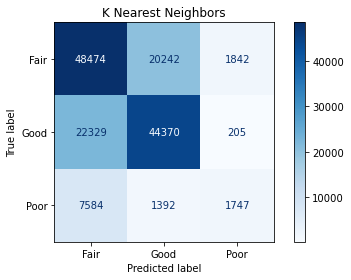

In [85]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Standardization

First scale the data. We scale the data after splitting the train and test data to avoid data leakage. We use standardization so that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

In [86]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Orthotropic,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru
0,-1.080208,-0.882637,-0.239328,-0.317957,0.082843,-0.366578,2.334734,-0.201127,0.291625,-0.227231,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,-0.802160,-0.010919,-0.249486,-0.023144,-0.11253
1,-0.874480,-1.021765,-1.061838,-0.317957,-0.072013,-0.366578,-0.489493,-0.201127,-0.385266,-0.260052,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
2,1.091363,1.204270,0.583182,3.261670,0.103042,1.552256,-0.192653,0.533380,0.291625,0.477603,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
3,1.982850,0.842539,-0.239328,-0.317957,0.103042,-0.366578,-0.489493,-0.201127,-0.159636,-0.195108,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
4,-0.714469,-0.799161,-0.239328,-0.317957,0.096309,-0.366578,-0.489493,-0.201127,0.742886,0.072114,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,-0.802160,-0.010919,4.008245,-0.023144,-0.11253


Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy.

In [87]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

In [88]:
# 

## Grid search CV

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}



grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [30, 40], 'n_neighbors': [1, 5, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [91]:
grid_search.best_params_

{'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [92]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

## Confusion Matrix

<Figure size 432x360 with 0 Axes>

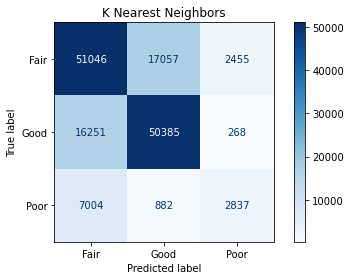

In [93]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn_tuned, scaled_data_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

In [94]:
print(classification_report(y_train, knn_tuned.predict(scaled_data_train)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    211671
        Good       1.00      1.00      1.00    200712
        Poor       1.00      1.00      1.00     32170

    accuracy                           1.00    444553
   macro avg       1.00      1.00      1.00    444553
weighted avg       1.00      1.00      1.00    444553



In [95]:
print(classification_report(y_test, knn_tuned.predict(scaled_data_test)))

              precision    recall  f1-score   support

        Fair       0.69      0.72      0.70     70558
        Good       0.74      0.75      0.75     66904
        Poor       0.51      0.26      0.35     10723

    accuracy                           0.70    148185
   macro avg       0.64      0.58      0.60    148185
weighted avg       0.70      0.70      0.70    148185



## Smote

To compensate for the under-represented class we will be using oversampling to make up for the imbalance.

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Fair    282229
Good    267616
Poor     42893
Name: bridge_condition, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Fair    211671
Poor    211671
Good    211671
Name: bridge_condition, dtype: int64


In [99]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [100]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    211671
        Good       1.00      1.00      1.00    211671
        Poor       1.00      1.00      1.00    211671

    accuracy                           1.00    635013
   macro avg       1.00      1.00      1.00    635013
weighted avg       1.00      1.00      1.00    635013



In [101]:
print(classification_report(y_test, knn_smote.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.66      0.51      0.58     70558
        Good       0.71      0.71      0.71     66904
        Poor       0.23      0.58      0.33     10723

    accuracy                           0.60    148185
   macro avg       0.53      0.60      0.54    148185
weighted avg       0.65      0.60      0.62    148185



## Confusion matrix

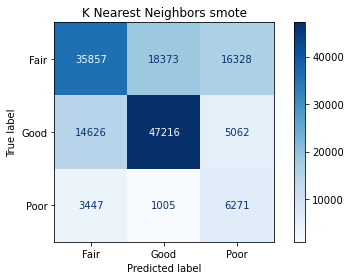

In [102]:
plot_confusion_matrix(knn_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

# Random Forest

## Baseline model

In [103]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest Baseline'
models.append(metrics)

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,forest.predict(X_test))

array([[56055, 13257,  1246],
       [14003, 52838,    63],
       [ 7781,   458,  2484]], dtype=int64)

In [105]:
print(classification_report(y_train, forest.predict(X_train)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    211671
        Good       1.00      1.00      1.00    200712
        Poor       1.00      1.00      1.00     32170

    accuracy                           1.00    444553
   macro avg       1.00      1.00      1.00    444553
weighted avg       1.00      1.00      1.00    444553



In [106]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.72      0.79      0.76     70558
        Good       0.79      0.79      0.79     66904
        Poor       0.65      0.23      0.34     10723

    accuracy                           0.75    148185
   macro avg       0.72      0.61      0.63    148185
weighted avg       0.75      0.75      0.74    148185



## Confusion Matrix

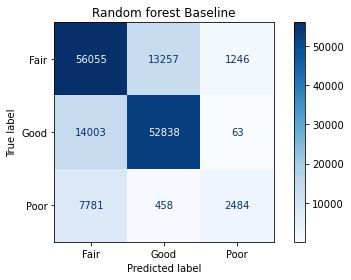

In [107]:
plot_confusion_matrix(forest, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)

plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Grid search

In [108]:
param_grid = {
    'n_estimators': [100, 200], # default 100 number of trees
    'max_depth': [30, 35, 40], # default None
    'max_features': ['auto',50, 60], # default 'auto': auto=sqrt(# of features)=11
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [109]:
grid_search.best_params_

{'max_depth': 40, 'max_features': 60, 'n_estimators': 200}

In [111]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=40,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70, class_weight='balanced')
forest_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_tuned)
metrics['name'] = 'Random Forest tuned'
models.append(metrics)

In [112]:
print(classification_report(y_train, forest_tuned.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.77      0.65      0.70    211671
        Good       0.80      0.79      0.80    200712
        Poor       0.40      0.85      0.54     32170

    accuracy                           0.73    444553
   macro avg       0.66      0.76      0.68    444553
weighted avg       0.76      0.73      0.74    444553



In [113]:
print(classification_report(y_test, forest_tuned.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.72      0.60      0.66     70558
        Good       0.78      0.77      0.77     66904
        Poor       0.33      0.70      0.45     10723

    accuracy                           0.69    148185
   macro avg       0.61      0.69      0.63    148185
weighted avg       0.72      0.69      0.69    148185



In [114]:
param_grid = {
    'n_estimators': [150, 200], # default 100
    'max_depth': [35, 40, 50], # default None
    'max_features': [55, 60, 65],
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35 
# we assume 35 would be the min sample leaf and avoid further search    
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [115]:
grid_search.best_params_

{'max_depth': 50, 'max_features': 65, 'n_estimators': 200}

In [123]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=50,
                                      max_features=65, min_samples_leaf=35, 
                                      min_samples_split=70, class_weight='balanced')
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned'
models.append(metrics)

In [124]:
print(classification_report(y_train, forest_tuned.predict(scaled_data_train)))

              precision    recall  f1-score   support

        Fair       0.77      0.65      0.71    211671
        Good       0.81      0.80      0.80    200712
        Poor       0.40      0.85      0.54     32170

    accuracy                           0.73    444553
   macro avg       0.66      0.76      0.68    444553
weighted avg       0.76      0.73      0.74    444553



In [125]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test)))

              precision    recall  f1-score   support

        Fair       0.72      0.60      0.66     70558
        Good       0.78      0.77      0.77     66904
        Poor       0.33      0.70      0.45     10723

    accuracy                           0.69    148185
   macro avg       0.61      0.69      0.63    148185
weighted avg       0.72      0.69      0.69    148185



## Smote

In [126]:
forest_smote = RandomForestClassifier(n_estimators=200, max_depth=50,
                                      max_features=65, min_samples_leaf=35, 
                                      min_samples_split=70, class_weight='balanced')
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

In [127]:
print(classification_report(y_train_resampled, forest_smote.predict(X_train_resampled)))

              precision    recall  f1-score   support

        Fair       0.73      0.79      0.76    211671
        Good       0.81      0.80      0.80    211671
        Poor       0.94      0.88      0.91    211671

    accuracy                           0.82    635013
   macro avg       0.83      0.82      0.82    635013
weighted avg       0.83      0.82      0.82    635013



In [131]:
print(classification_report(y_test, forest_smote.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.71      0.75      0.73     70558
        Good       0.78      0.77      0.77     66904
        Poor       0.50      0.35      0.41     10723

    accuracy                           0.73    148185
   macro avg       0.66      0.62      0.64    148185
weighted avg       0.73      0.73      0.73    148185



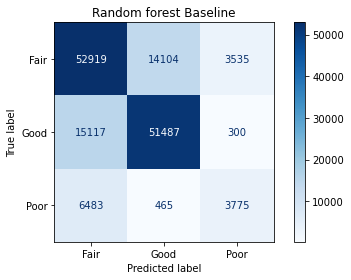

In [132]:
plot_confusion_matrix(forest_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)

plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Feature importance

Text(0, 0.5, 'Features')

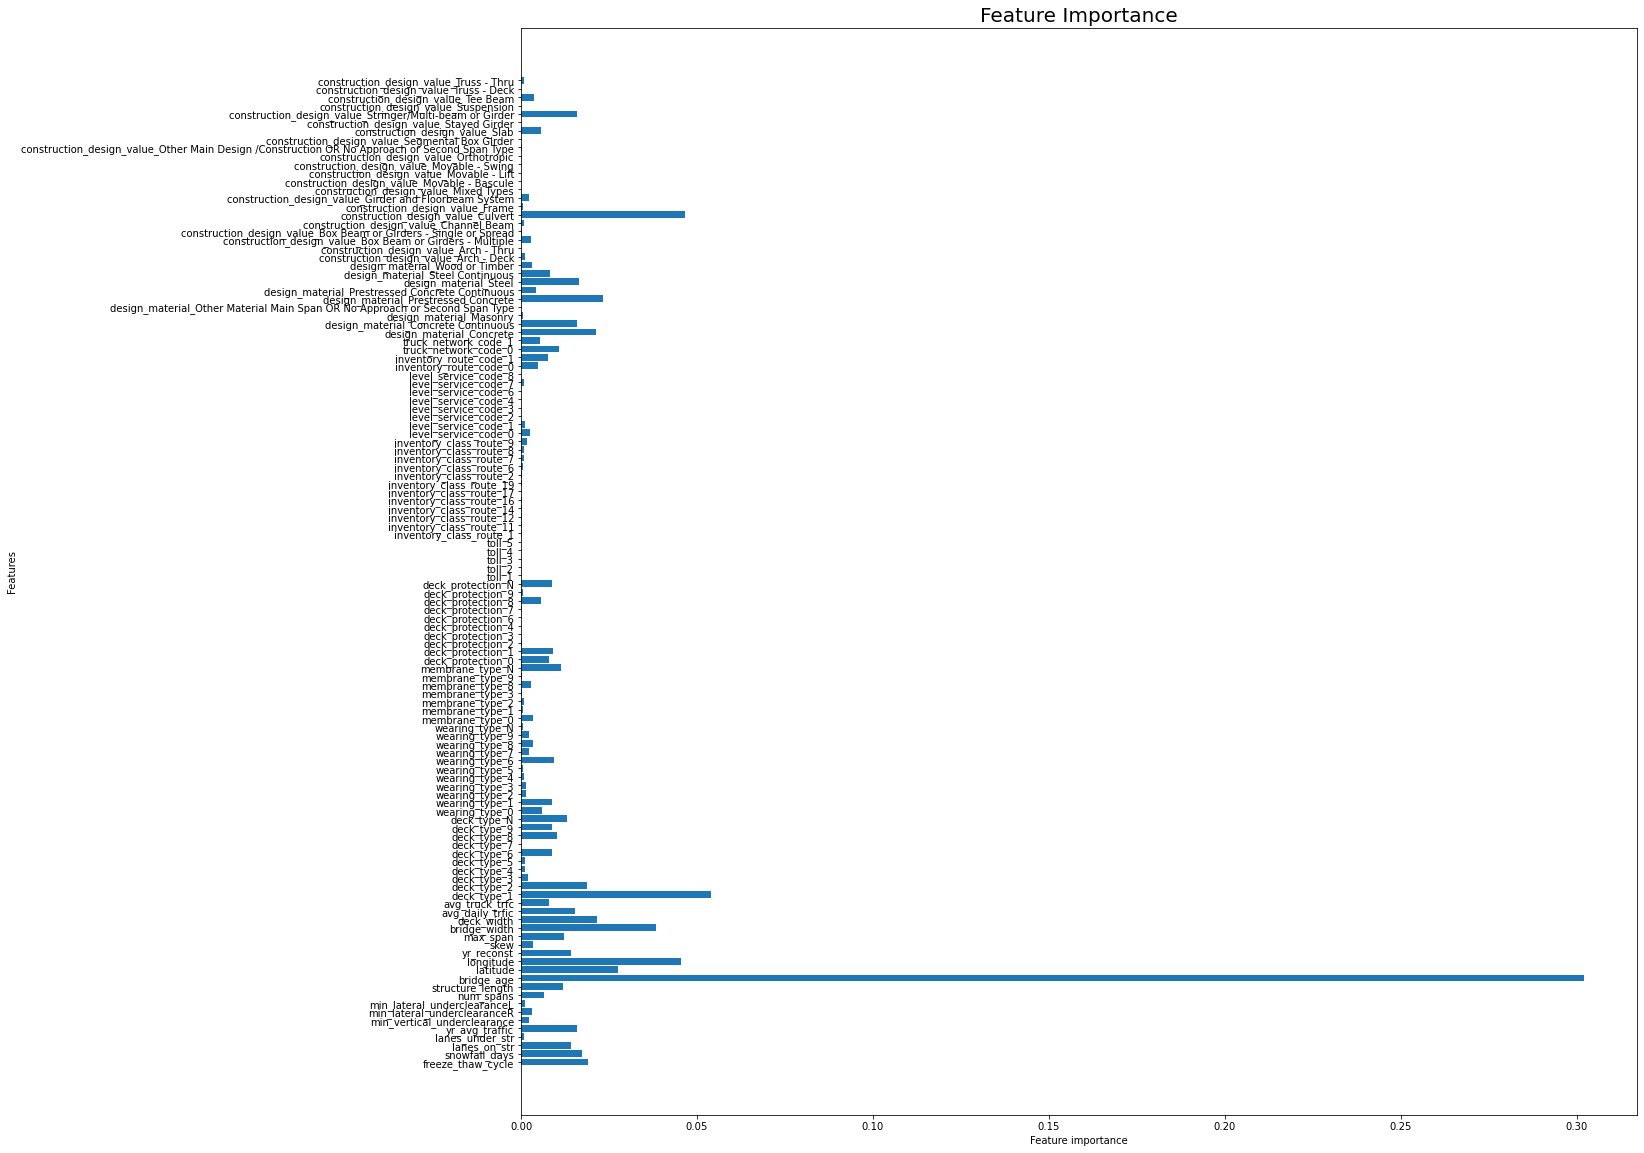

In [136]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest_smote.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

# XGBoost

In [154]:
import xgboost as xgb

In [137]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [138]:
# Replace target values - there are three classes
y = y.replace({'Poor' : 2, 
                'Fair' : 1, 
                'Good' : 0})


In [139]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=df_dummies['bridge_condition'], random_state = 42)

## Baseline model

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
# metrics['name'] = 'XG Boost Baseline'
# models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:24:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [146]:
print(classification_report(y_train, xgb.predict(X_train),
                            target_names=['Good','Fair','Poor']))

              precision    recall  f1-score   support

        Good       0.79      0.78      0.78    200712
        Fair       0.71      0.80      0.75    211671
        Poor       0.70      0.22      0.33     32170

    accuracy                           0.75    444553
   macro avg       0.73      0.60      0.62    444553
weighted avg       0.75      0.75      0.74    444553



In [147]:
print(classification_report(y_test, xgb.predict(X_test), 
                           target_names=['Good','Fair','Poor']))

              precision    recall  f1-score   support

        Good       0.78      0.76      0.77     66904
        Fair       0.70      0.78      0.74     70558
        Poor       0.64      0.20      0.30     10723

    accuracy                           0.73    148185
   macro avg       0.70      0.58      0.60    148185
weighted avg       0.73      0.73      0.72    148185



## Confusion matrix

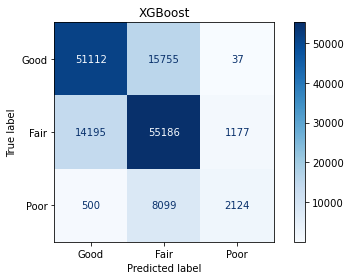

In [145]:
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['Good','Fair','Poor'],
                     values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

## Standardization

In [148]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost_scaled'
models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Grid search

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1], #boosting rate
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7], #fraction of sample for next round
    'n_estimators': [100, 150, 200], #number of boosted trees
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train, eval_metric="error")

In [ ]:
grid_search.best_params_

In [149]:
# Instantiate XGBClassifier and fit classifier
xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.5, eval_metric='error', use_label_encoder =False,
                          num_class=3)
xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)

In [150]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train),
                           target_names=['Good','Fair','Poor']))

              precision    recall  f1-score   support

        Good       0.85      0.84      0.84    200712
        Fair       0.78      0.85      0.81    211671
        Poor       0.84      0.37      0.52     32170

    accuracy                           0.81    444553
   macro avg       0.82      0.69      0.72    444553
weighted avg       0.81      0.81      0.80    444553



In [151]:
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test),
                           target_names=['Good','Fair','Poor']))

              precision    recall  f1-score   support

        Good       0.79      0.78      0.79     66904
        Fair       0.72      0.79      0.75     70558
        Poor       0.65      0.24      0.35     10723

    accuracy                           0.75    148185
   macro avg       0.72      0.61      0.63    148185
weighted avg       0.75      0.75      0.74    148185



## Confusion matrix

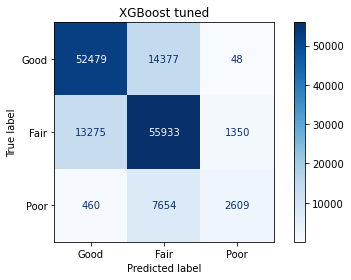

In [152]:
plot_confusion_matrix(xgb_tuned, scaled_data_test, y_test, values_format='d',
                       display_labels=['Good','Fair','Poor'], cmap=plt.cm.Blues)
plt.title('XGBoost tuned')
plt.tight_layout()

plt.show()

In [ ]:
param_grid = {
    'learning_rate': [0.07, 0.1],
    'max_depth': [9, 10, 12],
    'subsample': [0.4, 0.5, 0.8],
    'n_estimators': [175, 200, 250],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train, eval_metric="error")

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
grid_search.best_params_

In [149]:
# Instantiate XGBClassifier and fit classifier
xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.5, eval_metric='error', use_label_encoder =False,
                          num_class=3)
xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)

## Smote

In [156]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

1    282229
0    267616
2     42893
Name: bridge_condition, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    211671
1    211671
0    211671
Name: bridge_condition, dtype: int64


In [157]:
# Initializing the params
xgb_params = {
    'max_depth':10,
    'eval_metric': 'merror',
    'subsample':0.5,
    'num_class':3,
    'learning_rate':0.1,
#     'objective' : multi:softmax

}
# Convert the predictor and target variables to Dmatrix data structure 
dtrain = xgb.DMatrix(X_train_resampled, y_train_resampled, feature_names=X_train_resampled.columns.values)
dtest =   xgb.DMatrix(X_test, y_test, feature_names=X_test.columns.values)

# create a list of evaluation criteria for training and test data
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params,
                      dtrain = dtrain,
                      num_boost_round = 100,
                      verbose_eval = 25,
                      early_stopping_rounds = 40,
                      evals = evals
#                       maximize = True,
# #                       objective = 'multi:softmax'
                    
                    )

[0]	train-merror:0.25591	eval-merror:0.32607
[25]	train-merror:0.20487	eval-merror:0.28834
[40]	train-merror:0.19304	eval-merror:0.27970


In [158]:
# Instantiate XGBClassifier and fit classifier
xgb_smote = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.5, eval_metric='error', use_label_encoder =False,
                          num_class=3,  objective = 'multi:softmax')
xgb_smote.fit(X_train_resampled, y_train_resampled)

TypeError: Not supported type for data.<class 'xgboost.core.DMatrix'>

In [159]:
print(classification_report(y_train_resampled, xgb_model.predict(dtrain),
                           target_names=['Good','Fair','Poor']))

              precision    recall  f1-score   support

        Good       0.79      0.79      0.79    211671
        Fair       0.71      0.76      0.73    211671
        Poor       0.92      0.88      0.90    211671

    accuracy                           0.81    635013
   macro avg       0.81      0.81      0.81    635013
weighted avg       0.81      0.81      0.81    635013



In [167]:
print(classification_report(y_test, xgb_model.predict(dtest),
                           target_names=['Good','Fair','Poor']))

              precision    recall  f1-score   support

        Good       0.77      0.77      0.77     66904
        Fair       0.70      0.73      0.72     70558
        Poor       0.46      0.36      0.40     10723

    accuracy                           0.72    148185
   macro avg       0.64      0.62      0.63    148185
weighted avg       0.72      0.72      0.72    148185



## Confusion matrix

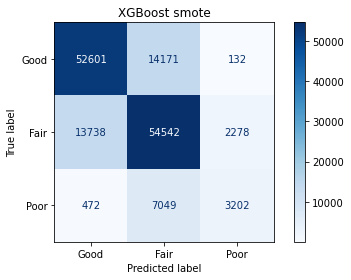

In [169]:
plot_confusion_matrix(xgb_smote, X_test, y_test, values_format='d',
                      display_labels=['Good','Fair','Poor'],cmap=plt.cm.Blues)
plt.title('XGBoost smote')
plt.tight_layout()

plt.show()

In [163]:
models = pd.DataFrame(models)

In [165]:
models.head()

,accuracy,f1,precision,recall,name
0,0.638330,0.519754,0.583696,0.504373,K Nearest Neighbors Baseline
1,0.678476,0.569913,0.618292,0.551929,K Nearest Neighbors smote
2,0.678476,0.569913,0.618292,0.551929,K Nearest Neighbors smote
3,0.678476,0.569913,0.618292,0.551929,K Nearest Neighbors smote
4,0.751608,0.629851,0.722985,0.605288,Random Forest smote


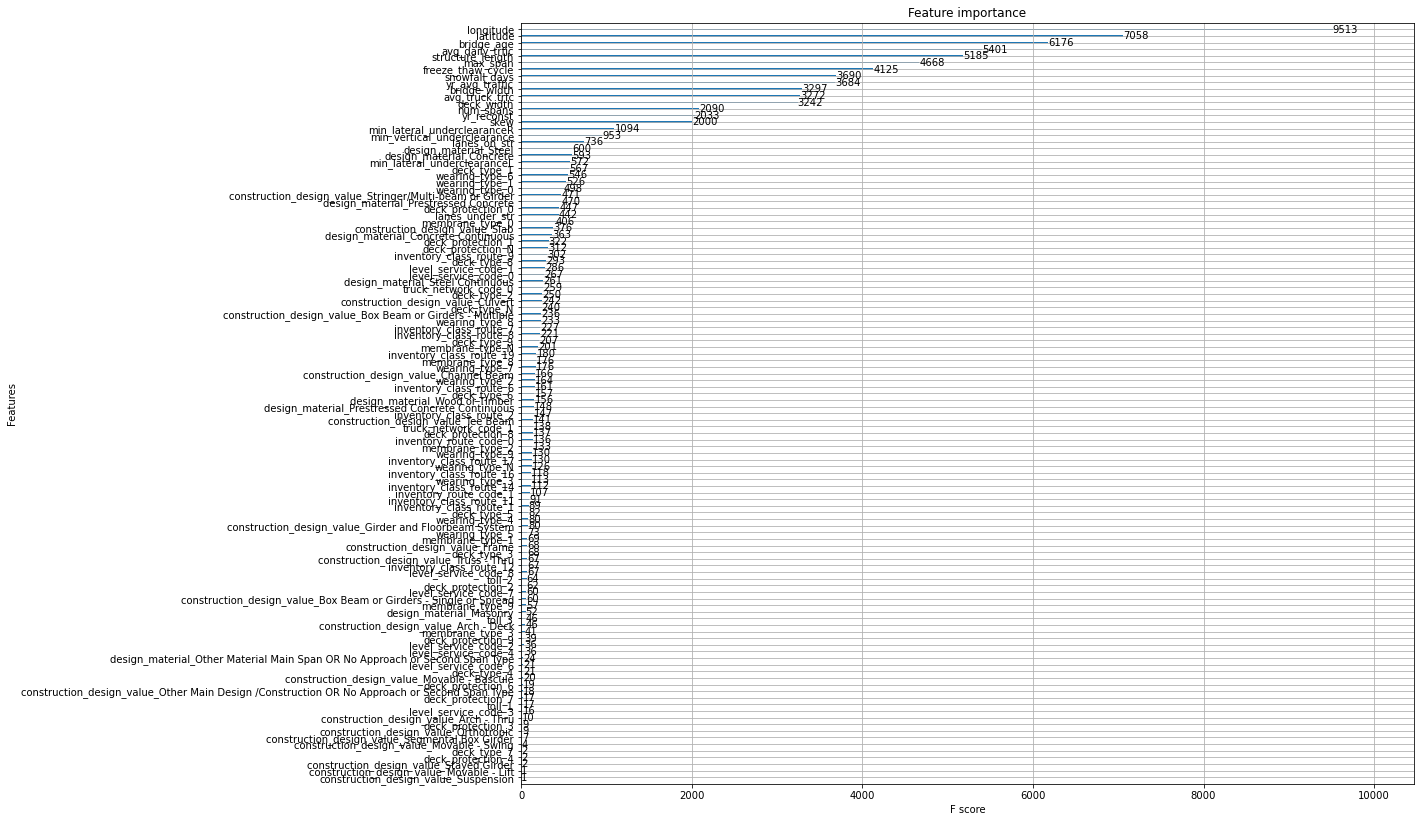

In [164]:
# Plotting feature importance
fig, ax = plt.subplots(figsize = (16,14))
xgb.plot_importance(xgb_model, ax = ax)
plt.show()

# Conclusions and Recommendation


Over all the RandomForest model was able to deliver the best possible alternative algorithm for the Bridge condition calssification. Moreover, class imbalance affected the performance of the models greatly and as a result, the instances belonging to the minority group were consistently misclassified more often than those belonging to the majority group.

**Random forest:** 

   1. Baseline model
    
    Good  (79%)     
    Fair  (76%)   
    Poor  (34%) 
    
    
   2. Gridsearch CV
    
     Good  (66%)     
     Fair   (77%)   
     Poor  (45%) 
     
    
   3. SMOTE
    
    Good  (77%)     
    Fair   (73%)   
    Poor  (41%) 



In [ ]:
#Looking at the results of macro_avg for all our models
values = [60, 64, 63]
keys   = ['Model_1', 'Model_2', 'Model_3']
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
clrs    = ['green' if (x == max(values)) else 'grey' for x in values]
sns.barplot(keys, values, palette = clrs)
ax.set_ylabel('macro_avg')
ax.set_xticklabels(['Model_1', 'Model_2', 'Model_3'])
ax.set_title('Model Performance', fontsize=15);

 Given more time and with some more tunning it may be able to increase its performance.
 
 # Further Study
 
- With limited resources to properly maintain and upgrade transportation infrastructure, bridges often end up exceeding their expected service lifespan and so I would be interested in investigating if past failures help identify vulnerable bridges to extreme events

- Explore how model would be able to adjust to the process of load rating,  measures of bridge live load capacity, to assess the adequacy of individual structures.


-  Evaluating how wind factors affect the condition of long span bridge could be targeted to showcase its impact.

- Last but not least, incorporating  the above mentioned features and expanding number of parameters used for Classification algorithms to deliver a model much more sophisticated and Robust would be ideal. 